In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shapefile
from shapely.geometry import shape, Point

In [2]:
# creates lat lon array
respix = 0.25 #0.1
lats = np.arange(1.5, -18.75-respix, -respix)
lons = np.arange(278.5, 293.0+respix, respix)-360.0
lons, lats = np.meshgrid(lons, lats)

In [3]:
# import shapefile
ShapeFile = '/home/joao/Downloads/Cuzco_new2.shp'

# creates mask
r = shapefile.Reader(ShapeFile)
shapes = r.shapes()
polygon = shape(shapes[0])
Mask = [[1 if polygon.contains(Point(lons[j,i],lats[j,i]))==True else 0 for i in range(lons.shape[1])] for j in range(lons.shape[0])]
Mask = np.array(Mask, dtype='int16')

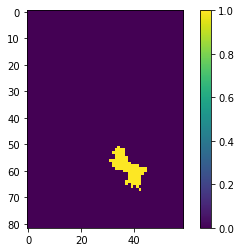

In [4]:
img = plt.imshow(Mask)
plt.colorbar(img)
plt.show()